In [2]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv('export.csv')
df = df.drop(['TimeStamp','Id','humidityRating'] ,1)
# df = df.drop("Id",1)
df.head(40)
df.shape
#,'pm1', 'pm25'

C:\Users\DavidHeavey\AppData\Local\Temp\ipykernel_17932\1086832232.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['TimeStamp','Id','humidityRating'] ,1)


(52036, 7)

In [4]:
df.describe()

,co2,temperature,humidity,tvoc,pm1,pm25,virusRisk
count,52036.000000,52036.000000,52036.000000,50704.000000,20690.000000,20690.000000,52036.000000
mean,535.465812,19.456761,43.895803,147.037630,3.542726,3.880280,3.592763
std,301.541157,11.407644,21.194443,184.681582,6.759246,7.074903,2.955554
min,399.000000,11.400000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,458.000000,16.900000,39.000000,63.000000,1.000000,1.000000,3.000000
50%,483.000000,18.400000,43.000000,97.000000,2.000000,3.000000,3.000000
75%,529.000000,20.500000,46.000000,170.000000,4.000000,5.000000,4.000000
max,10090.000000,259.000000,440.000000,9720.000000,413.000000,440.000000,100.000000


In [40]:
#sns.countplot(x='virusRisk', data=df)
df['virusRisk'].max()
#df['virusRisk']

100

In [41]:
df.dtypes

co2              int64
temperature    float64
humidity         int64
tvoc           float64
pm1            float64
pm25           float64
virusRisk        int64
dtype: object

In [42]:
df_sorted = df.sort_values('virusRisk')
df_sorted.head()

,co2,temperature,humidity,tvoc,pm1,pm25,virusRisk
18888,465,18.1,54,140.0,1.0,1.0,0
18916,466,17.6,55,116.0,0.0,0.0,0
18908,467,17.8,55,119.0,0.0,0.0,0
18904,455,17.9,55,114.0,0.0,0.0,0
18876,451,18.6,53,133.0,0.0,0.0,0


In [43]:
df_highVR = df.query('virusRisk > 10')
df_highVR.head(10)
df_highVR.shape
df_highVR

,co2,temperature,humidity,tvoc,pm1,pm25,virusRisk
45980,4500,186.0,370,690.0,0.0,0.0,40
45984,4690,185.0,370,690.0,0.0,0.0,40
45985,476,202.0,340,84.0,0.0,0.0,40
45988,457,18.4,37,63.0,0.0,0.0,40
45990,4640,200.0,370,630.0,10.0,10.0,40
...,...,...,...,...,...,...,...
49411,606,21.3,37,298.0,0.0,0.0,40
49413,5120,179.0,400,910.0,10.0,10.0,50
49418,640,21.1,37,318.0,0.0,0.0,40
49442,746,20.3,39,311.0,1.0,1.0,40


In [44]:
# drop rows which contain blanks
df=df.dropna()
df.shape

(20542, 7)

In [45]:
#Drop Rows where virusRisk >10
df.drop(df.loc[df['virusRisk']>10].index, inplace=True)
df.shape

(20372, 7)

<AxesSubplot:xlabel='virusRisk', ylabel='count'>

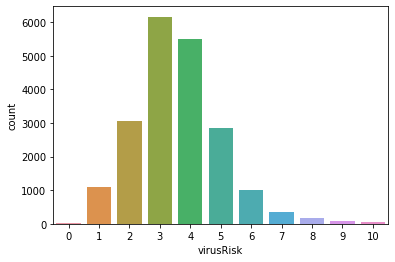

In [46]:
sns.countplot(x='virusRisk', data=df)

In [51]:
df['temperature'].max()
df_highTemp = df.query('temperature > 35')
df_highTemp.shape
df_highTemp
df.drop(df.loc[df['temperature']>35].index, inplace=True)
df.shape

(20290, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20290 entries, 0 to 52028
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   co2          20290 non-null  int64  
 1   temperature  20290 non-null  float64
 2   humidity     20290 non-null  int64  
 3   tvoc         20290 non-null  float64
 4   pm1          20290 non-null  float64
 5   pm25         20290 non-null  float64
 6   virusRisk    20290 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [53]:
df = df.sample(frac=1)

In [56]:
y=df['virusRisk']
x=df.drop('virusRisk',axis=1)
print(y)
x.shape

49498     7
2264      4
17809     2
14941     4
34182     7
         ..
39739     3
22500     6
20201     1
34045     3
35913    10
Name: virusRisk, Length: 20290, dtype: int64


(20290, 6)

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
X_std= ss.transform(x)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(14203, 6)

In [62]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],39)
    self.layer2=nn.Linear(39,26)
    self.layer3=nn.Linear(26,13)
    self.layer4=nn.Linear(13,1)
  def forward(self,x):
    x=nn.functional.relu(self.layer1(x))
    x=nn.functional.relu(self.layer2(x))
    x=nn.functional.relu(self.layer3(x))
    x=self.layer4(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=6, out_features=39, bias=True)
  (layer2): Linear(in_features=39, out_features=26, bias=True)
  (layer3): Linear(in_features=26, out_features=13, bias=True)
  (layer4): Linear(in_features=13, out_features=1, bias=True)
)


In [63]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.4130, -0.3628, -0.4874, -0.6867, -0.2230, -0.2613],
        [-0.4130,  0.1639, -0.3796, -0.7203,  0.5229,  0.4562],
        [ 0.0191,  0.9540, -0.3796,  0.1131, -0.2230, -0.2613],
        ...,
        [-0.1475, -0.9883,  0.4829, -0.9622,  0.3737,  0.3127],
        [-0.6264,  3.7521, -1.1344,  0.2004, -0.5214, -0.5484],
        [-0.2776,  0.7235, -0.3796,  0.1601, -0.5214, -0.5484]],
       requires_grad=True)

In [66]:
import torch.optim as optim
optimizer= optim.SGD(model.parameters(),lr=0.003)
loss_fn=nn.MSELoss()

In [67]:
epochs=20
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%5==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:13.969691276550293
epochs: 5......loss:13.100091934204102
epochs: 10......loss:12.284679412841797
epochs: 15......loss:11.510775566101074


In [70]:
# Validation
from sklearn.metrics import r2_score
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

-4.120932377808187
-4.121258145658547


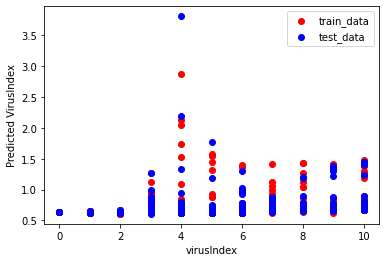

In [71]:
plt.xlabel("virusIndex")
plt.ylabel("Predicted VirusIndex")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()